In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
control_method = ["No_control", "Signal_optimization_only", "Eco-Driving_only", "Proposed_control"]
demand_perct = ["50", "60", "70", "80", "90", "100", "110", "120", "130", "140", "150"]
CAV_MPR = ["0", "10", "20", "30", "40", "50", "60", "70", "80", "90", "100"]
filepath = 'results/' + control_method[0] + '_' + demand_perct[0] + '_' + CAV_MPR[5] + '.csv'
trajectory_results = pd.read_csv(filepath, delimiter='\t')
filter_trajctory_by_time = trajectory_results[trajectory_results['simulation_time'].between(4000, 5000)]
vehicle_id = filter_trajctory_by_time.vehicle_id.unique()
control_vehicle_id = 5380
non_control_vehicle_id = 154
section_dict = {'1249': [1252, 5325], '1272': [1270, 1784]}
filter_trajctory_by_time.head()


,simulation_time,section_id,veh_type_id,numberLane,vehicle_id,distance2End,CurrentSpeed
36081,4000.0,1249,5380,1,828,116.99100,51.0923
36082,4000.0,1249,154,1,829,197.59700,54.4591
36083,4000.0,1252,5380,1,812,6.07215,34.7945
36084,4000.0,1252,154,2,821,4.39035,32.2674
36085,4000.0,1272,154,1,814,167.23100,56.8977


In [30]:
for col_section, downstream_section in section_dict.items():
        col_section = int(col_section)
        filter_trajctory_by_time.loc[filter_trajctory_by_time['section_id']==col_section, 'distance2End'] *= -1

d:\Aimsun\Aimsun_scripting\Model\.venv\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,simulation_time,section_id,veh_type_id,numberLane,vehicle_id,distance2End,CurrentSpeed
36081,4000.0,1249,5380,1,828,-116.9910,51.0923
36088,4000.8,1249,5380,1,828,-105.6370,51.0923
36098,4001.6,1249,5380,1,828,-94.2829,51.0923
36110,4002.4,1249,5380,1,828,-82.9290,51.0923
36124,4003.2,1249,5380,1,828,-71.5752,51.0923


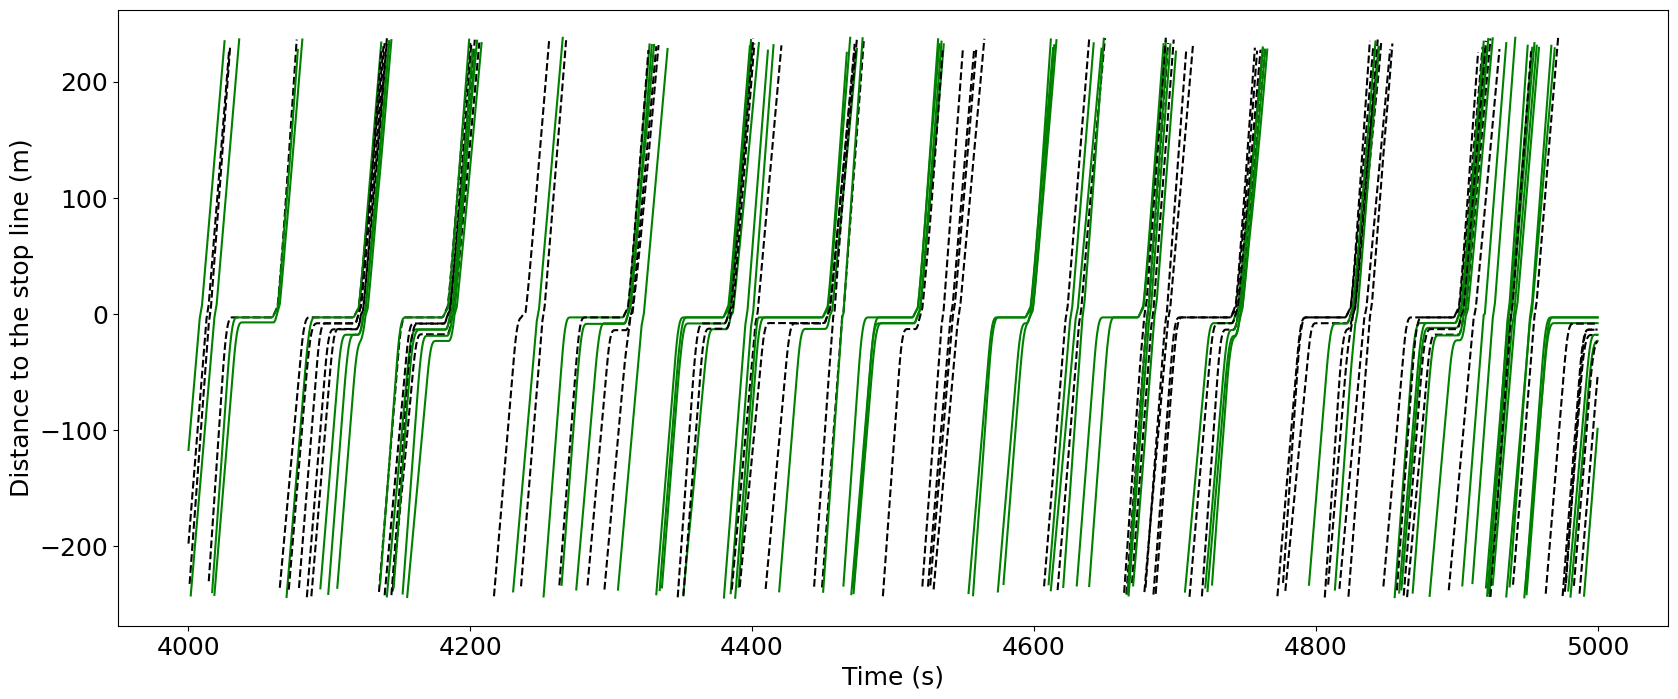

In [31]:
plot_sec_id = [1249, 1252]
numlane = [1, 2, 3]
reduced_trajectory = filter_trajctory_by_time[filter_trajctory_by_time.section_id.isin(plot_sec_id)]
error_check = pd.DataFrame(columns=['simulation_time', 'section_id', 'veh_type_id', 'numberLane', 'vehicle_id', 'distance2End', 'CurrentSpeed'])

plt.figure(figsize=(20,8))

for veh_id in vehicle_id:
    veh_id_df = reduced_trajectory[reduced_trajectory.vehicle_id == veh_id].sort_values('simulation_time')

    if veh_id_df['section_id'] not in np.array(plot_sec_id[0]): # do not plot trajectories for those which do not travel from the control section
        continue
    
    if control_vehicle_id in veh_id_df['veh_type_id'].unique():
        color = 'g'
    else:
        color = 'k--'
    
    veh_id_df = veh_id_df[veh_id_df['numberLane'].isin(numlane)]
    error_check = error_check.append(veh_id_df)
    time = veh_id_df['simulation_time']
    plt.plot(time, veh_id_df['distance2End'], color)
    plt.xlabel('Time (s)', fontdict={'size':18, 'color':'black'})
    plt.ylabel('Distance to the stop line (m)', fontdict={'size': 18})
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)

error_check.head()

In [46]:
CAV_penetration_list = [10,20]
CAV_penetration_list = (CAV_penetration_list*2)
CAV_penetration_list.sort()

print(CAV_penetration_list)

[10, 10, 20, 20]


In [35]:
CAV_penetration_list